In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [36]:
df = pd.read_csv('data/output/Data-World-Cup-2018.csv')

In [37]:
df.head()

,Team,#,Pos.,Player,Alias,HAS_PLAYED,Club,League,CountryCode
0,Argentina,1,GK,GUZMAN Nahuel,GUZMAN,True,Tigres UANL,Primera Division,MEX
1,Argentina,2,DF,MERCADO Gabriel,MERCADO,True,Sevilla FC,Primera Division,ESP
2,Argentina,3,DF,TAGLIAFICO Nicolas,TAGLIAFICO,True,AFC Ajax,Eredivisie,NED
3,Argentina,4,DF,ANSALDI Cristian,ANSALDI,False,Torino FC,Serie A,ITA
4,Argentina,5,MF,BIGLIA Lucas,BIGLIA,True,AC Milan,Serie A,ITA


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 9 columns):
Team           736 non-null object
#              736 non-null int64
Pos.           736 non-null object
Player         736 non-null object
Alias          736 non-null object
HAS_PLAYED     736 non-null bool
Club           736 non-null object
League         736 non-null object
CountryCode    736 non-null object
dtypes: bool(1), int64(1), object(7)
memory usage: 46.8+ KB


In [39]:
played = df[df['HAS_PLAYED']==True]
played.head()

,Team,#,Pos.,Player,Alias,HAS_PLAYED,Club,League,CountryCode
0,Argentina,1,GK,GUZMAN Nahuel,GUZMAN,True,Tigres UANL,Primera Division,MEX
1,Argentina,2,DF,MERCADO Gabriel,MERCADO,True,Sevilla FC,Primera Division,ESP
2,Argentina,3,DF,TAGLIAFICO Nicolas,TAGLIAFICO,True,AFC Ajax,Eredivisie,NED
4,Argentina,5,MF,BIGLIA Lucas,BIGLIA,True,AC Milan,Serie A,ITA
6,Argentina,7,MF,BANEGA Ever,BANEGA,True,Sevilla FC,Primera Division,ESP


## List of national teams

In [40]:
len(played['Team'].value_counts())

32

In [41]:
played['Team'].value_counts()

Tunisia           23
England           21
Poland            21
Panama            21
Belgium           21
Croatia           21
Argentina         20
Germany           20
Costa Rica        19
France            19
Colombia          19
Mexico            19
Korea Republic    19
Denmark           18
Japan             18
Saudi Arabia      18
Morocco           18
Serbia            18
Iceland           18
Senegal           17
Egypt             17
Peru              17
Uruguay           17
Brazil            17
Sweden            17
Russia            17
Spain             17
Portugal          16
IR Iran           16
Switzerland       16
Nigeria           15
Australia         15
Name: Team, dtype: int64

## List of Leagues

In [42]:
played['League_ID'] = played['CountryCode'] +" - "+played['League']

/Users/gcg/.virtualenvs/ddj/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [43]:
played['League_ID'].value_counts()

ENG - Premier League                                  92
ESP - Primera Division                                70
GER - Bundesliga                                      55
ITA - Serie A                                         44
FRA - Ligue 1                                         34
RUS - Premjer-Liga                                    30
KSA - Saudi Professional League                       24
MEX - Primera Division                                19
TUR - Süper Lig                                       17
ENG - Championship                                    16
POR - Primeira Liga                                   14
USA - Major League Soccer                             14
NED - Eredivisie                                      13
BEL - First Division A                                11
KOR - K League                                         9
CHN - Super League                                     8
ARG - Primera Division                                 7
EGY - Premier League           

## How many different leagues are represented among the players of the 2018 WorldCup?

In [44]:
len(played['League_ID'].value_counts())

58

## How many different leagues are represented in each national team?

In [45]:
played.groupby(by='Team')['League_ID'].nunique().sort_values(ascending = True)

Team
England            1
Saudi Arabia       2
Russia             2
Spain              3
France             5
Germany            5
Brazil             6
Switzerland        7
Mexico             7
Nigeria            7
IR Iran            7
Tunisia            8
Japan              8
Egypt              8
Senegal            8
Belgium            8
Denmark            8
Portugal           8
Argentina          9
Peru               9
Korea Republic     9
Uruguay            9
Poland            10
Costa Rica        10
Serbia            10
Colombia          10
Australia         10
Morocco           11
Croatia           11
Sweden            12
Iceland           13
Panama            13
Name: League_ID, dtype: int64

## (a) How many players of each league play in each national team?

In [46]:
played.groupby(by='Team')['League_ID'].value_counts()

Team            League_ID                                         
Argentina       ARG - Primera Division                                 4
                ENG - Premier League                                   4
                ESP - Primera Division                                 3
                ITA - Serie A                                          3
                POR - Primeira Liga                                    2
                CHN - Super League                                     1
                FRA - Ligue 1                                          1
                MEX - Primera Division                                 1
                NED - Eredivisie                                       1
Australia       ENG - Championship                                     3
                AUS - A-League                                         2
                ENG - Premier League                                   2
                SUI - Super League                       

## (b) How many players are in each national team?

In [47]:
played.groupby(by='Team')['Player'].nunique()

Team
Argentina         20
Australia         15
Belgium           21
Brazil            17
Colombia          19
Costa Rica        19
Croatia           21
Denmark           18
Egypt             17
England           21
France            19
Germany           20
IR Iran           16
Iceland           18
Japan             18
Korea Republic    19
Mexico            19
Morocco           18
Nigeria           15
Panama            21
Peru              17
Poland            21
Portugal          16
Russia            17
Saudi Arabia      18
Senegal           17
Serbia            18
Spain             17
Sweden            17
Switzerland       16
Tunisia           23
Uruguay           17
Name: Player, dtype: int64

## (c) How many players has each league sent to a World Cup team?

In [48]:
played['League_ID'].value_counts()

ENG - Premier League                                  92
ESP - Primera Division                                70
GER - Bundesliga                                      55
ITA - Serie A                                         44
FRA - Ligue 1                                         34
RUS - Premjer-Liga                                    30
KSA - Saudi Professional League                       24
MEX - Primera Division                                19
TUR - Süper Lig                                       17
ENG - Championship                                    16
POR - Primeira Liga                                   14
USA - Major League Soccer                             14
NED - Eredivisie                                      13
BEL - First Division A                                11
KOR - K League                                         9
CHN - Super League                                     8
ARG - Primera Division                                 7
EGY - Premier League           

## VISUALIZING

In [53]:
score = pd.read_csv('data/output/DW-Score-2018-GroupPhase.csv')

In [54]:
score

,League,DW_Score_2018
0,ENG - Premier League,1758.96
1,ESP - Primera Division,1155.28
2,GER - Bundesliga,563.28
3,ITA - Serie A,425.96
4,FRA - Ligue 1,256.17
5,RUS - Premjer-Liga,197.30
6,KSA - Saudi Professional League,66.76
7,MEX - Primera Division,75.34
8,TUR - Süper Lig,44.69
9,ENG - Championship,30.43


In [55]:
import seaborn as sns

In [56]:
!pwd

/Users/gcg/Desktop/DW_data/WM


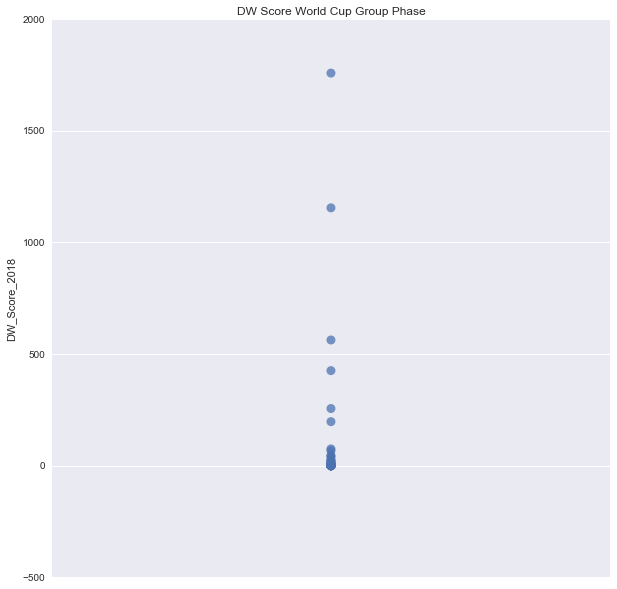

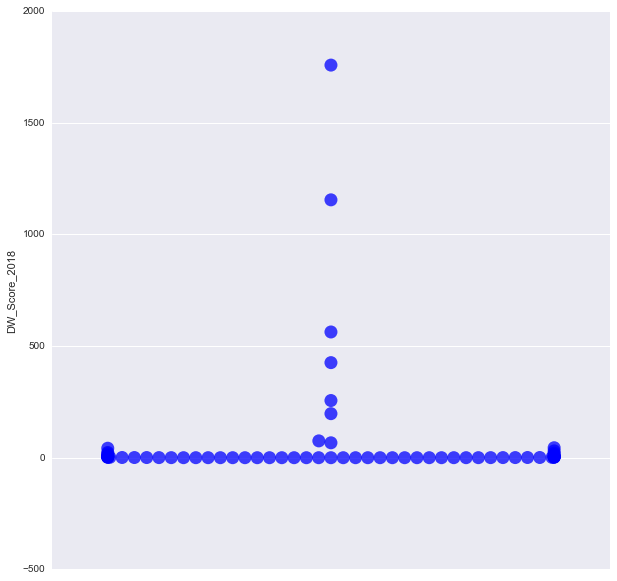

In [58]:
data_selection = score

#stripplot

fig, ax = plt.subplots(figsize = (10,10))
ax.set_title('DW Score World Cup Group Phase')
sns.stripplot(ax = ax, y="DW_Score_2018", data=data_selection, alpha=.75, s=9)


fig, ax = plt.subplots(figsize = (10,10))
sns.swarmplot(y="DW_Score_2018", data=data_selection, color="blue", alpha=.75, s=13)
# plt.savefig('visuals/drafts/dw-score-2018n.pdf', transparent = True)
